In [282]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [283]:
# Importing the dataset
df=pd.read_csv(r"C:\Users\pallv\Downloads\train.csv")

In [284]:
# Shape 
df.shape

(891, 12)

In [285]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [286]:
df.tail()                           

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,...,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,...,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,...,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,...,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,...,0,370376,7.75,NaN,Q


In [287]:
# Listing down the columns 
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [288]:
# Categorical Columns 
#Survived , pclass, Sex, SibSp, Parch , Embarked 
# Numerical - PassengerId , Age , Fare 
# Mixed columns - Name , Ticket , Cabin 

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [290]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [291]:
# Few conclusions 
#1. Missing values in Age , Cabin , Embarked columns 
#2. More than 70 % values are missing in cabin , will have to drop 
#3. Few columns have inappropriate data types 

In [292]:
# Dropping cabin column
df.drop(columns=['Cabin'],inplace=True)

In [53]:
# Imputing missing values for age 
# Strategy - mean 
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [293]:
# Imputing missing values for embarked 
# finding the most appeared value in embarked column -
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [56]:
# replace the missing value with s
df['Embarked'].fillna('S',inplace=True)

In [59]:
# Want to check one more thing 
# should i cahnge the SibSp and Parch to catogories 
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [60]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [280]:
# Changing data type for the following columns 
# Survived(category)
# Pclass(category)
# Sex(category)
# Age(int)
# Embarked(category)

In [188]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']= df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')
df['SibSp']=df['SibSp'].astype('category')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    int32   
 10  Embarked     891 non-null    category
dtypes: category(5), int32(2), int64(2), object(2)
memory usage: 40.0+ KB


In [190]:
df.describe()

,PassengerId,Age,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.381594,31.785634
std,257.353842,13.013778,0.806057,49.703730
min,1.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,7.000000
50%,446.000000,29.000000,0.000000,14.000000
75%,668.500000,35.000000,0.000000,31.000000
max,891.000000,80.000000,6.000000,512.000000


<Axes: xlabel='Survived', ylabel='count'>

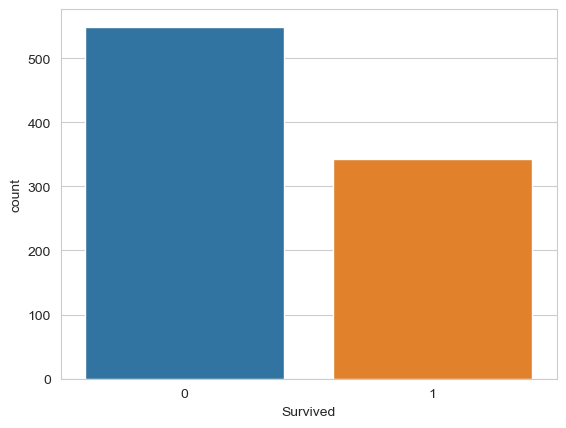

In [191]:
# Univariate Analysis 
# Let's satrt with the Survived col
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)
                    

In [192]:
# Pclass column 
print((df['Pclass'].value_counts()/891)*100)

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


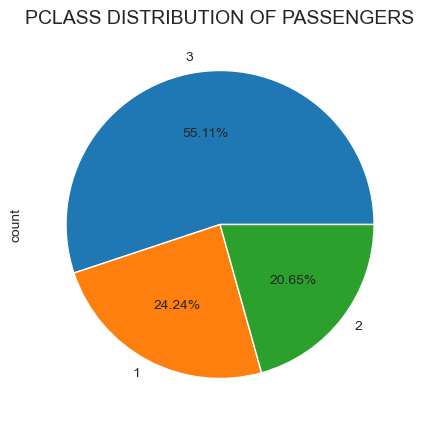

In [253]:
df['Pclass'].value_counts().plot.pie(autopct= "%1.2f%%", figsize=(5,5))
plt.title("Pclass distribution of passengers".upper(),fontsize=14)
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

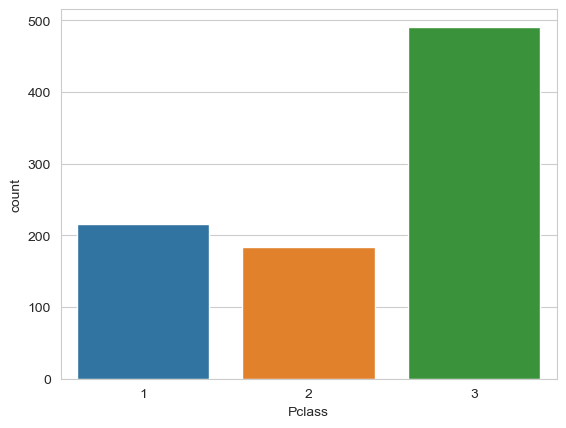

In [254]:
# ANOTHER WAY 
sns.set_style('whitegrid')
sns.countplot(x='Pclass',data=df)

In [194]:
print((df['Sex'].value_counts()/891)*100)

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

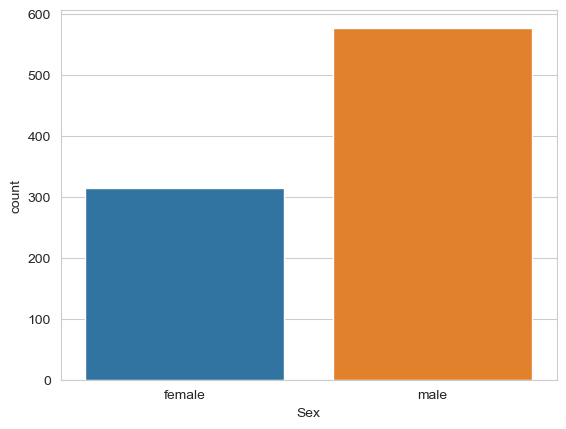

In [195]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=df)

In [196]:
print(df['SibSp'].value_counts())

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

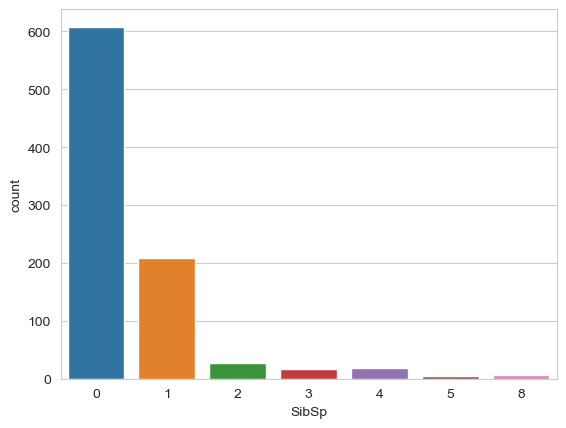

In [197]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=df)

In [198]:
print((df['Parch'].value_counts()/891)*100)

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

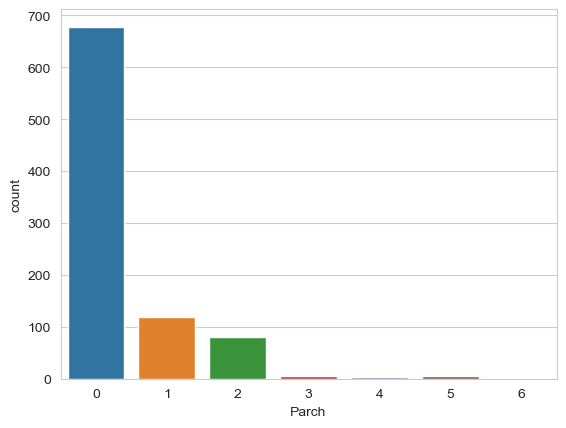

In [199]:
sns.countplot(x='Parch',data=df)

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

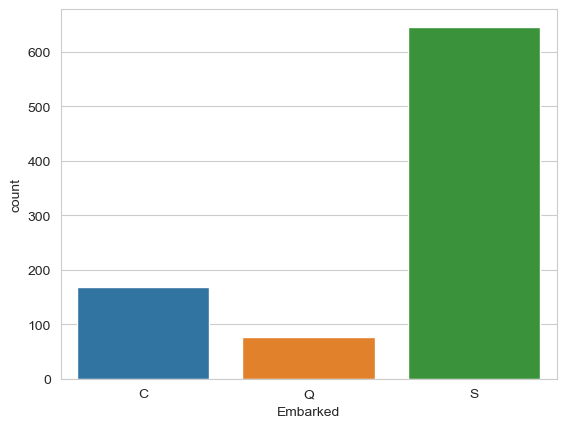

In [200]:
# embarked is city
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(x='Embarked',data=df)

0.45956263424701577
0.9865867453652877


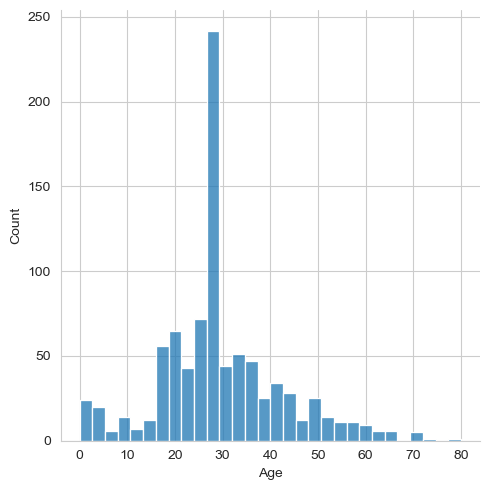

In [201]:
# Age column
sns.displot(df['Age'])
print(df['Age'].skew())
print(df['Age'].kurt())

In [202]:
#the distribution of age is very close to normal distribution 
# skew id 0.45 & we know -o.5 to 0.5 data can be considered as roughly a normal distribution 
# kurtosis is 0.986 ( Implication _ 
# the maximum  population is under the age group 20 to 40 

In [203]:
# WANNA KNOW EXECT NO OF PEOPLE BELONG TO EACH GROUP 
print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age in greater 70 and 75 are",df[(df['Age']>70) & (df['Age']<75)].shape[0])
print("People with age in greater than 75 are",df[df['Age']>75] .shape[0])
print('-'*50)
print("People with age between 0 and 2",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age in greater 70 and 75 are 3
People with age in greater than 75 are 1
--------------------------------------------------
People with age between 0 and 2 7


<Axes: >

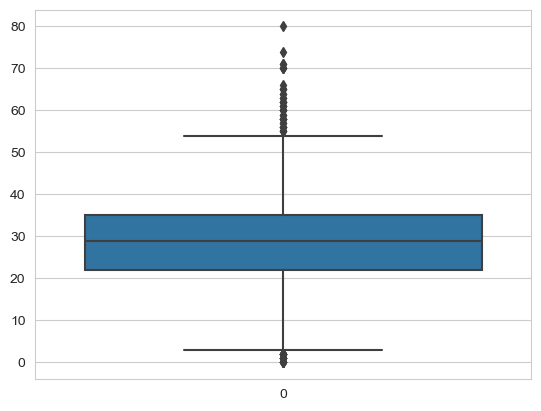

In [204]:
sns.boxplot(df['Age'])

In [205]:
# interquartial range is somewhere between 20 and 40 
# outlier are there after 55
# conclusion for all practical purposes  age can be considered as normal distribution 
# deeper analyis is required fro outlier detection

<function matplotlib.pyplot.show(close=None, block=None)>

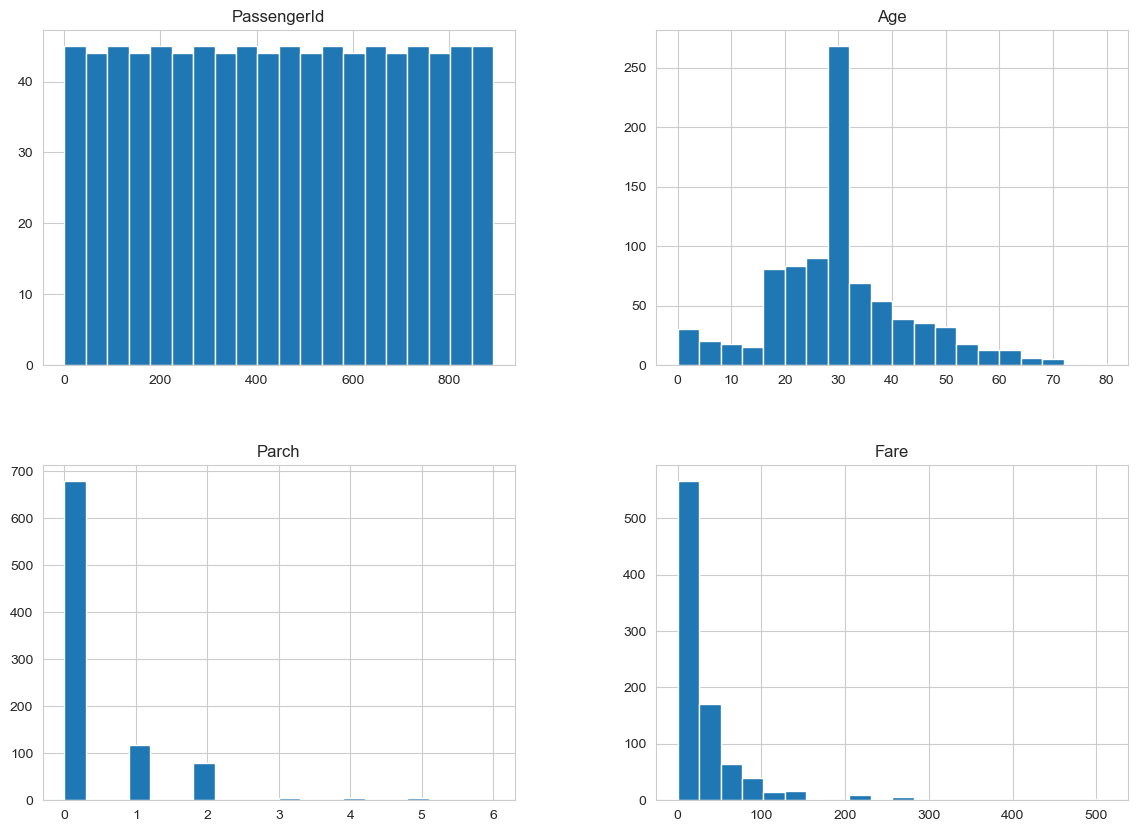

In [206]:
# FOR ALL IN ONE 
df.hist(bins=20,figsize=(14,10))
plt.show

In [207]:
# Conclusion

In [208]:
# conclusion

<Axes: xlabel='Fare', ylabel='Density'>

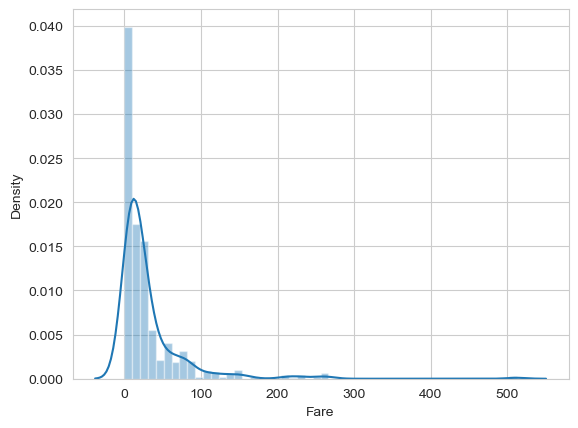

In [209]:
# fare column 
sns.distplot(df['Fare'])

In [210]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.786429747056348
33.398036702254934


<Axes: >

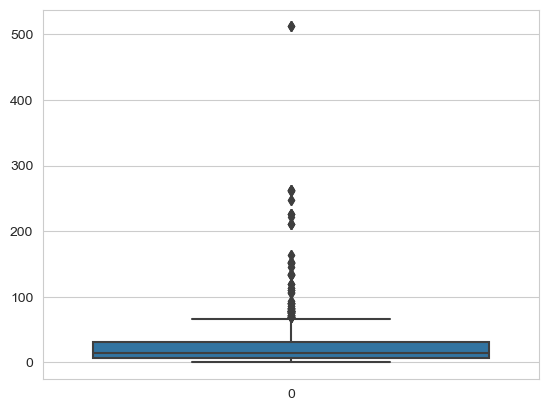

In [211]:
sns.boxplot(df['Fare'])

In [212]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare greater than $300 3


In [213]:
# conclusion 
# Highly skwed data , a lot of people had cheaper ticket 
# Outliers are there in tha data 

In [215]:
df['Parch']=df['Parch'].astype('int')
df['Pclass']=df['Pclass'].astype('int')
df['Age']=df['Age'].astype('int')
df['Fare']=df['Fare'].astype('int')
df['SibSp']=df['SibSp'].astype('int')

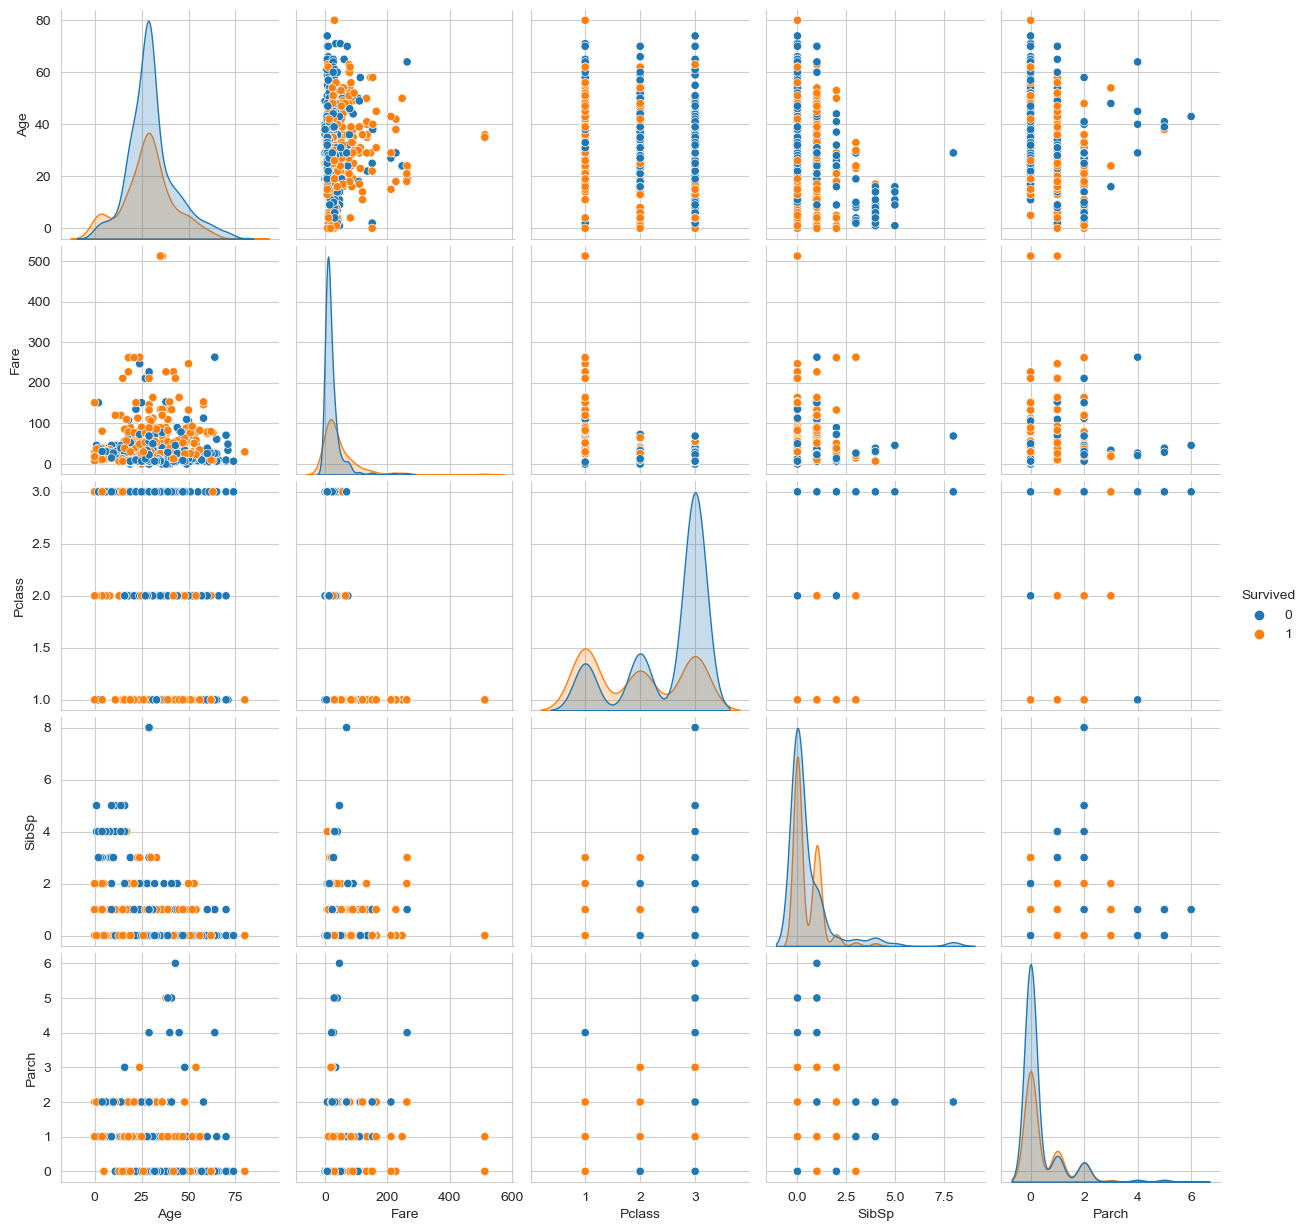

In [217]:
# PAIR PLOT TO EXAMINE RELATIONSHIHPS BETWEEN NUMERCIALS FEATURES ( for this we again change the data type of some columns ) 
sns.pairplot(df,hue='Survived',vars=['Age','Fare', 'Pclass', 'SibSp', 'Parch'])
plt.show()

In [ ]:
# conclusion

In [245]:
#

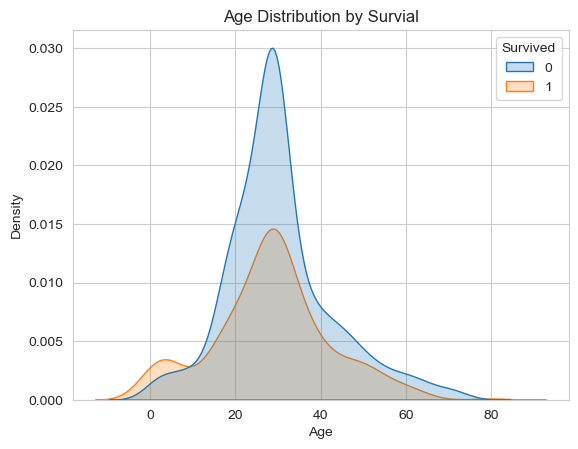

In [218]:
# Plot the age distribution by survival 
sns.kdeplot(data=df,x='Age',hue='Survived',fill=True)
plt.title('Age Distribution by Survial')
plt.show()

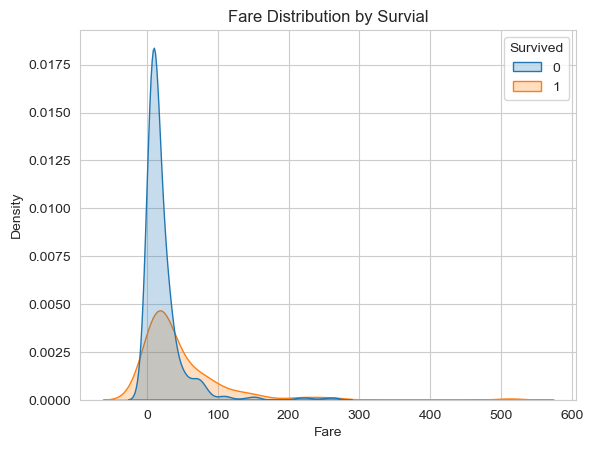

In [219]:
# SURVIVAL RATE BY FARE 
sns.kdeplot(data=df, x='Fare', hue = 'Survived', fill=True)
plt.title('Fare Distribution by Survial')
plt.show()

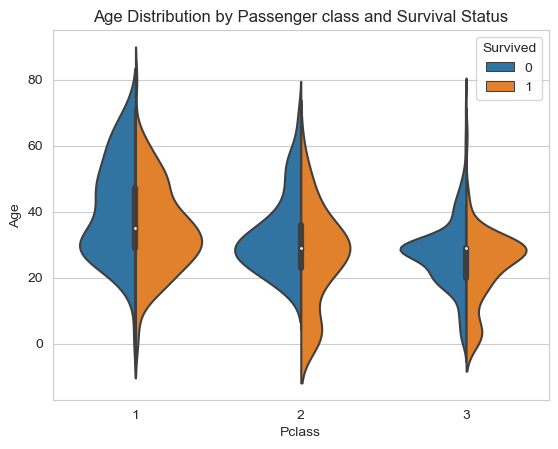

In [220]:
# Violin plot for age by passengers class and survial status 
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title('Age Distribution by Passenger class and Survival Status')
plt.show()

In [221]:
# conclusion


In [222]:
crosstab_result = pd.crosstab(df['Pclass'], df['Survived'])
print(crosstab_result)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [230]:
df['Pclass'] = df['Pclass'].astype(int)
df['Survived'] = df['Survived'].astype(int)

In [232]:
pip install --upgrade seaborn pandas


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:0

Error while plotting: 'numpy.int32' object has no attribute 'startswith'


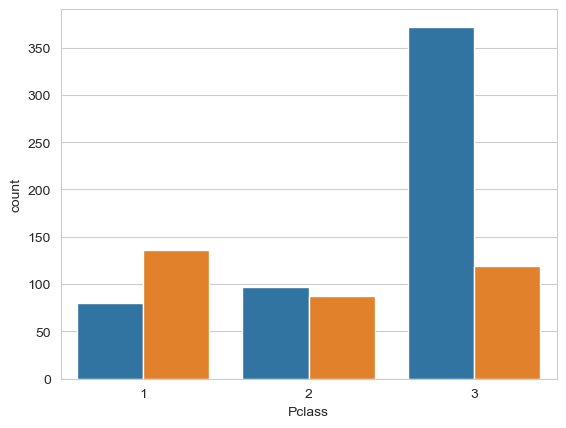

In [241]:
try:
    sns.countplot(x='Pclass', hue='Survived', data=df)
    plt.xlabel('Passenger Class')
    plt.ylabel('Count')
    plt.title('Count Plot of Passenger Class by Survival')
    plt.show()
except Exception as e:
    print("Error while plotting:", e)

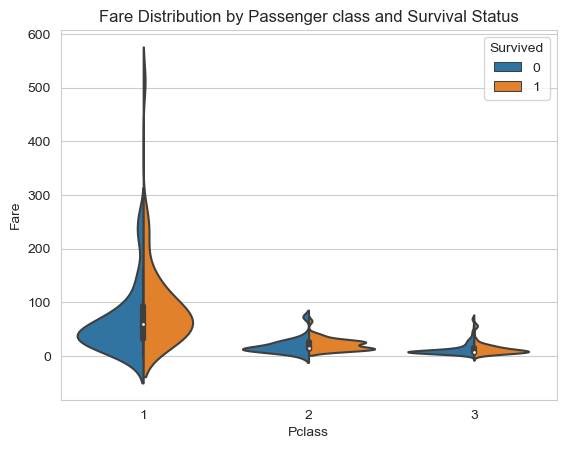

In [244]:
# Violin plot for fare by passengers class and survial status 
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df, split=True)
plt.title('Fare Distribution by Passenger class and Survival Status')
plt.show()

In [249]:
crosstab_result = pd.crosstab(df['Survived'], df['Sex'])
print(crosstab_result)

Sex       female  male
Survived              
0             81   468
1            233   109


Error while plotting: 'numpy.int32' object has no attribute 'startswith'


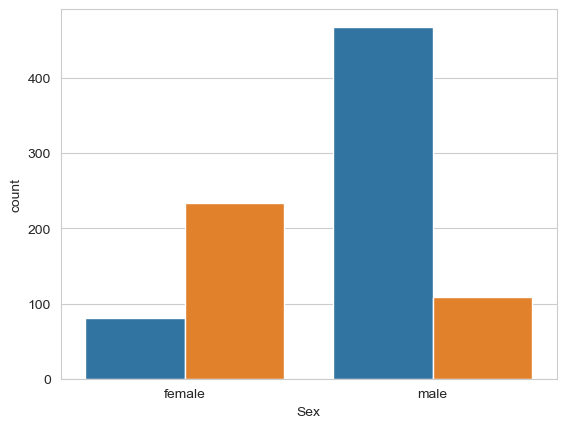

In [255]:
try:
    sns.countplot(x='Sex', hue='Survived', data=df)
    plt.xlabel('Passenger Class')
    plt.ylabel('Count')
    plt.title('Count Plot of Sex by Survival')
    plt.show()
except Exception as e:
    print("Error while plotting:", e)

In [256]:
# Survival with embarked 
crosstab_result = pd.crosstab(df['Survived'], df['Embarked'])
print(crosstab_result)

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


Error while plotting: 'numpy.int32' object has no attribute 'startswith'


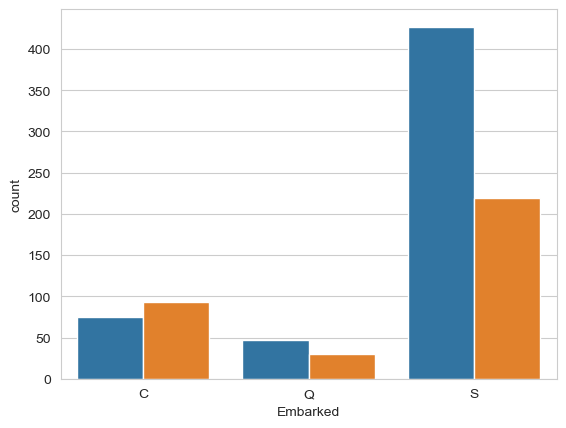

In [257]:
try:
    sns.countplot(x='Embarked', hue='Survived', data=df)
    plt.xlabel('Embarked')
    plt.ylabel('Count')
    plt.title('Count Plot of Embarked by Survival')
    plt.show()
except Exception as e:
    print("Error while plotting:", e)

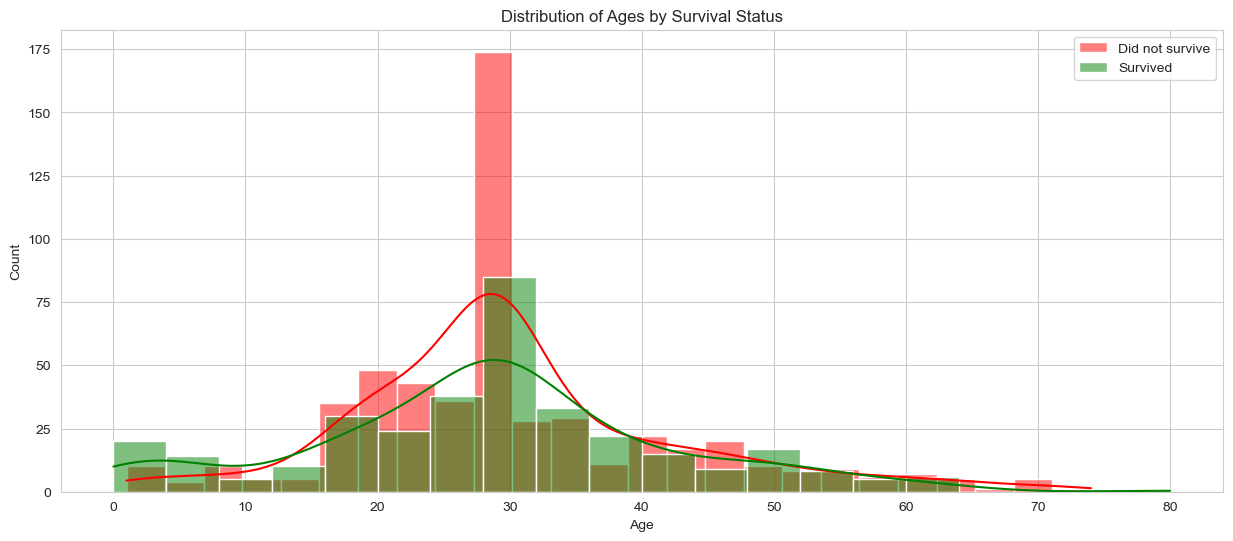

In [274]:
# Survived with age
# Set up the figure size
plt.figure(figsize=(15, 6))

# Plot the distribution of ages for non-survivors
sns.histplot(df[df['Survived'] == 0]['Age'].dropna(), color='red', kde=True, label='Did not survive')

# Plot the distribution of ages for survivors
sns.histplot(df[df['Survived'] == 1]['Age'].dropna(), color='green', kde=True, label='Survived')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages by Survival Status')
plt.legend()

# Show the plot
plt.show()

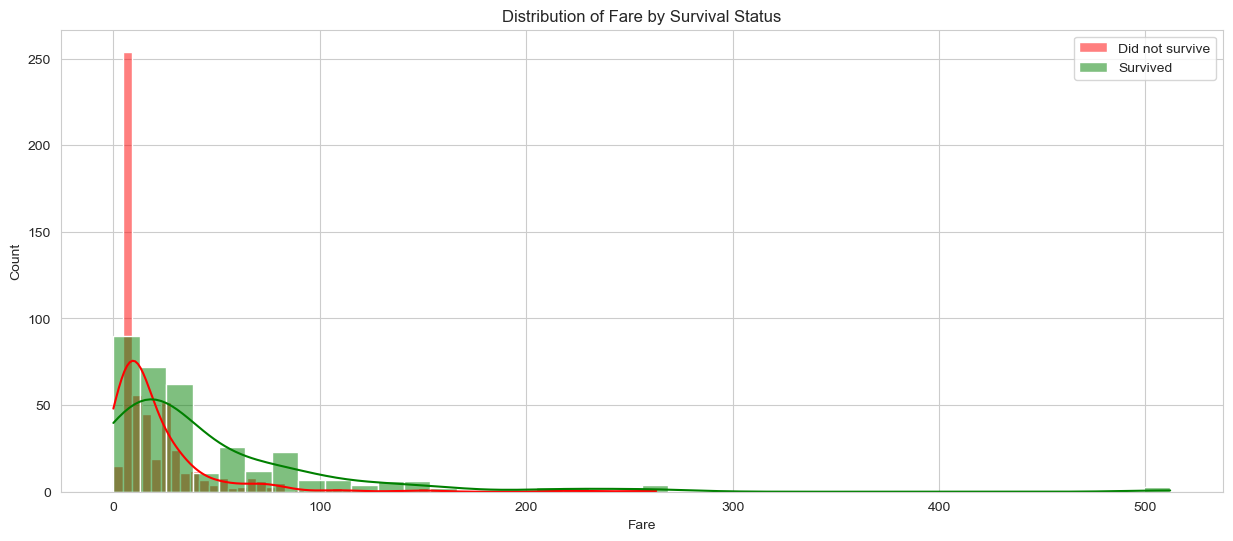

In [273]:
# sURVIVAL WITH FARE
# Set up the figure size
plt.figure(figsize=(15, 6))

# Plot the distribution of ages for non-survivors
sns.histplot(df[df['Survived'] == 0]['Fare'].dropna(), color='red', kde=True, label='Did not survive')

# Plot the distribution of ages for survivors
sns.histplot(df[df['Survived'] == 1]['Fare'].dropna(), color='green', kde=True, label='Survived')

# Add labels and title
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare by Survival Status')
plt.legend()

# Show the plot
plt.show()

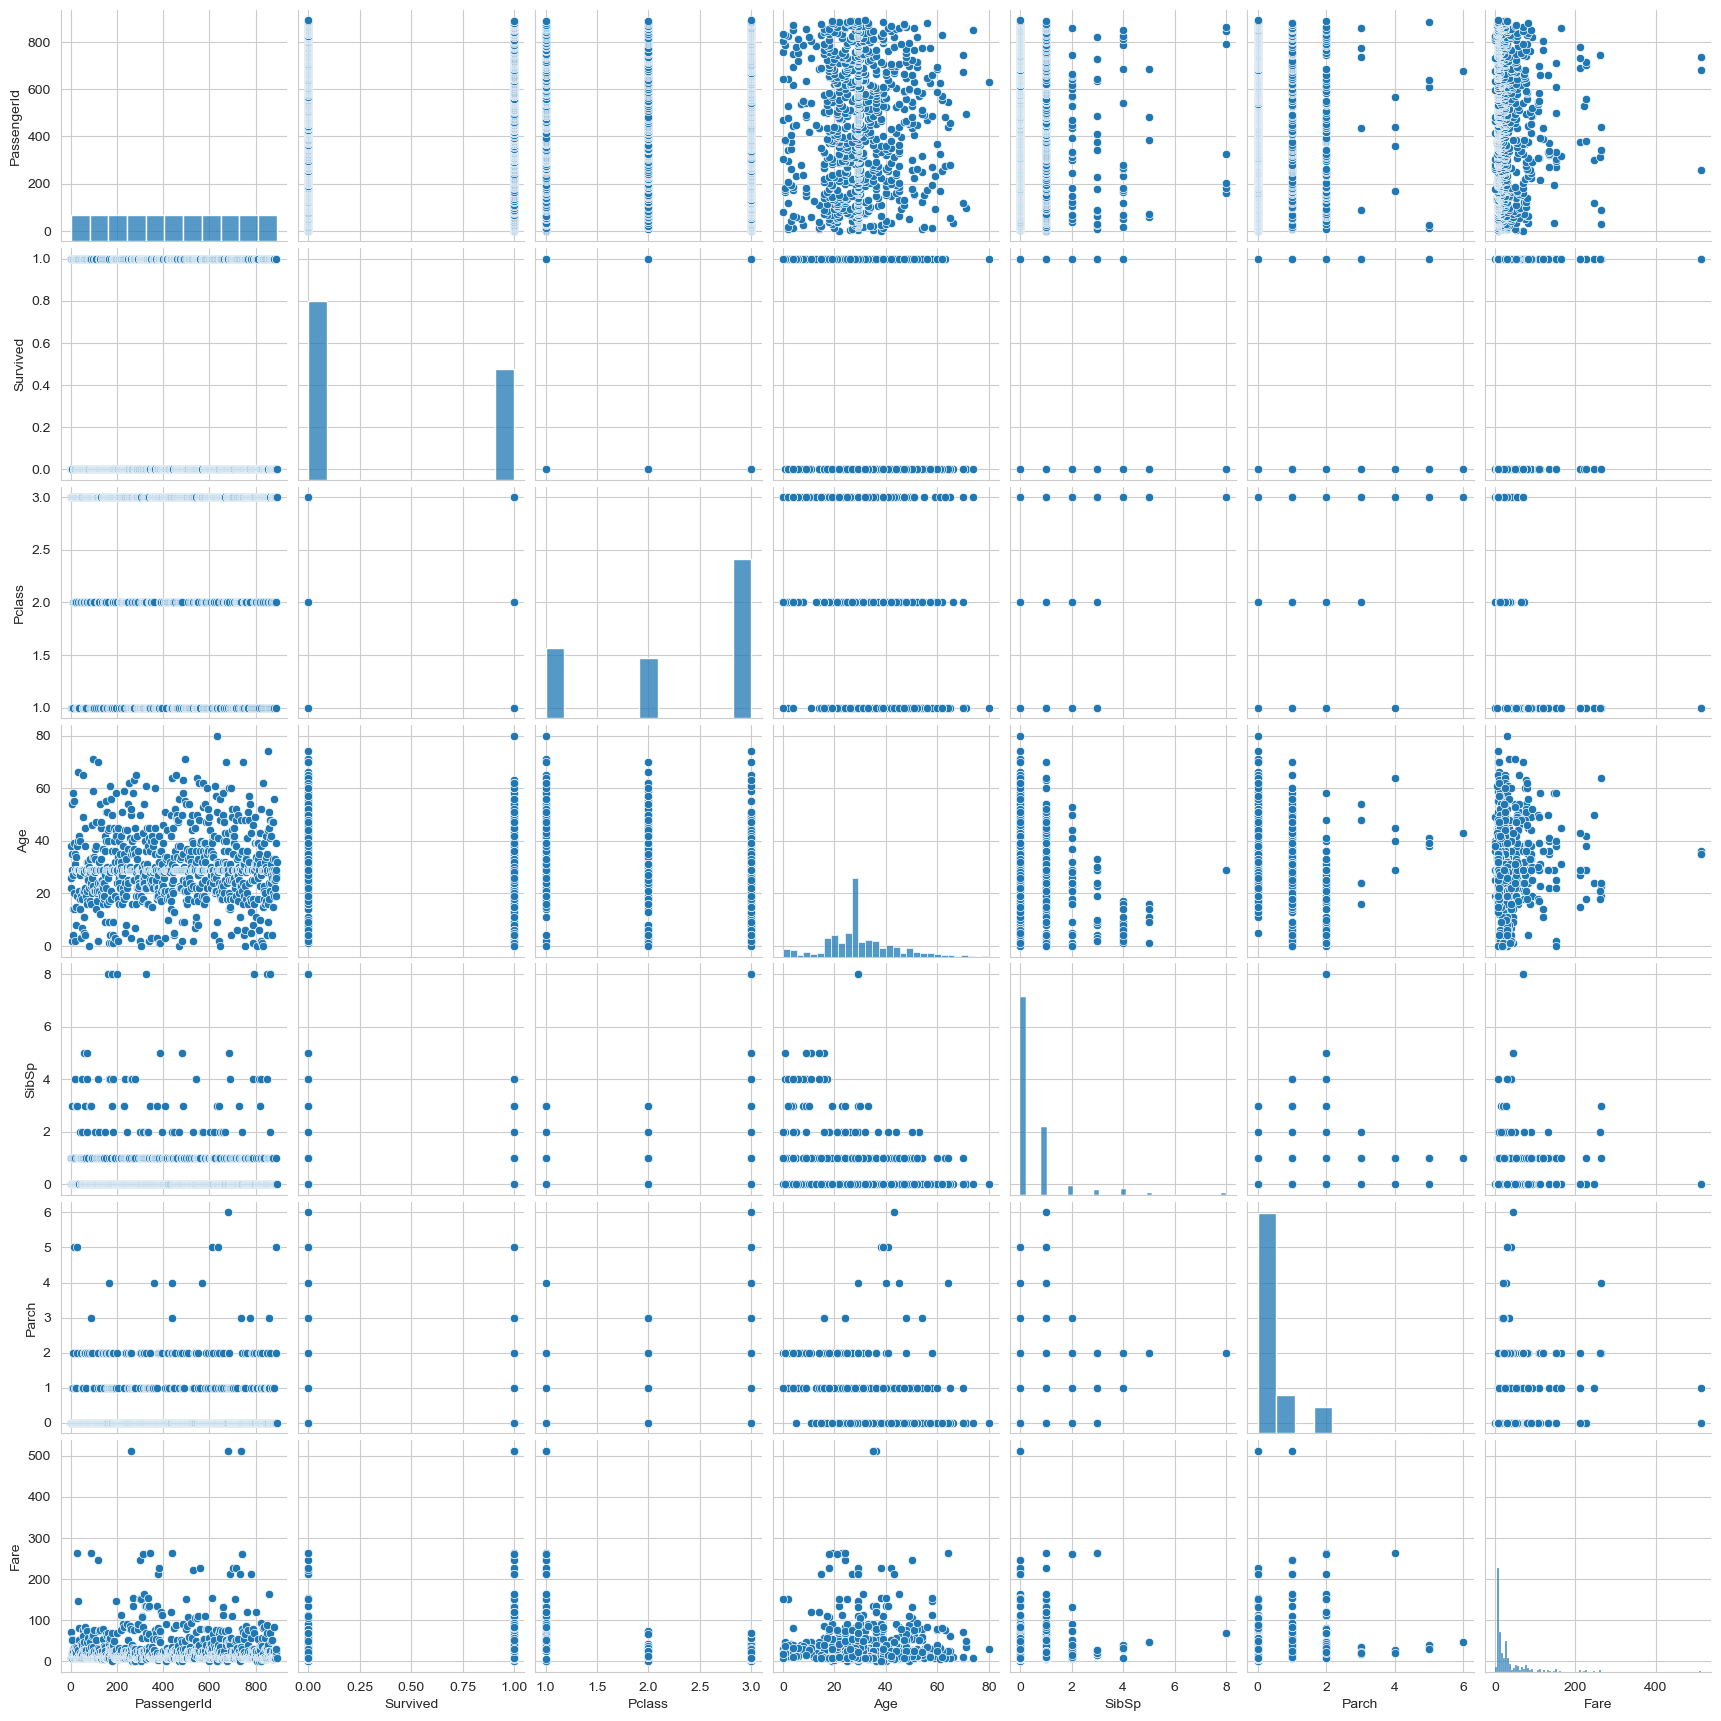

In [276]:
sns.pairplot(df)

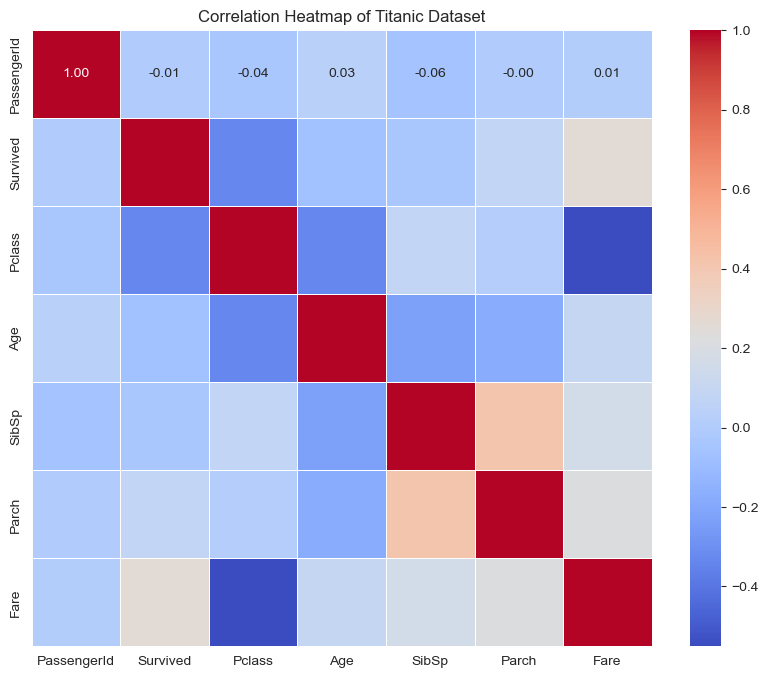

In [278]:
# Drop non-numeric columns to avoid errors in the correlation calculation
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Titanic Dataset')

# Show the plot
plt.show()
